## Asset Warranty Analysis (Flag 16)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow alm_hardware table, detailing key attributes of hardware assets such as asset tags, display names, configuration item (CI) identifiers, serial numbers, and model categories. It includes information on asset assignment, last update timestamps, cost, departmental allocation, and warranty expiration dates. The table effectively captures asset management activities, offering insights into the operational handling, allocation, and maintenance status of hardware resources across various departments within an organization.

### Your Task
**Goal**: Analyze the relationship between the cost of assets and their warranty periods to identify discrepancies and align procurement strategies with the observed asset value trends.

**Role**: Procurement Manager

**Difficulty**: 2 out of 5. This analysis requires deciphering complex patterns in asset pricing and warranty terms.

**Category**: Asset Management


## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

## Load Dataset
This cell loads the asset management dataset, which is crucial for the analysis of warranty periods relative to asset costs. The data is sourced from a CSV file and the process involves reading the file into a DataFrame to facilitate further operations. Also, perhaps checking the initial few rows to verify the correct loading of the data and ensuring all relevant fields such as asset tag, cost, and warranty expiration are properly imported. 

In [2]:
dataset_path = "csvs/flag-16.csv"
flag_data = pd.read_csv(dataset_path)
flag_data.head()

,assigned_to,purchased_on,cost,serial_number,sys_updated_on,warranty_expiration,model_category,department,asset_tag,display_name,ci
0,Valeria Lingbeek,2023-09-16 09:47:00,2688,FUM-85495157,2023-10-25 09:47:00,2026-04-16 09:47:00,Computer,Sales,P1000000,Dell Inspiron Desktop Computer,Inspiron Desktop
1,Kurtis Asberry,2024-03-26 15:43:00,2596,QFX-47362028,2024-04-11 15:43:00,2026-09-10 15:43:00,Computer,Sales,P1000001,Dell Inspiron 15,Inspiron 15
2,Darrel Tork,2024-03-09 10:16:00,4786,SKI-78647990,2024-04-23 10:16:00,2029-07-25 10:16:00,Computer,Customer Support,P1000002,Dell Inspiron 5558 Computer,Inspiron 5558
3,Dorthy Alexy,2024-01-31 09:21:00,1631,EMF-32833485,2024-02-12 09:21:00,2025-04-03 09:21:00,Computer,Development,P1000003,Dell Inspiron 15 3000 Computer,Inspiron 15 3000
4,Vince Ettel,2023-07-14 09:56:00,2834,XUQ-81198965,2023-09-04 09:56:00,2026-04-23 09:56:00,Computer,Customer Support,P1000004,Dell Inspiron 7000 Computer,Inspiron 7000


### **Question 1: What is the distribution Average Warranty Period across  Model Categories?**

#### Plot average warranty period by model category

This cell creates a bar plot to visualize the average warranty periods for different model categories of hardware assets. By examining the warranty duration associated with each category, this visualization aims to identify trends and discrepancies in warranty coverage that could influence procurement and asset amangement decisions

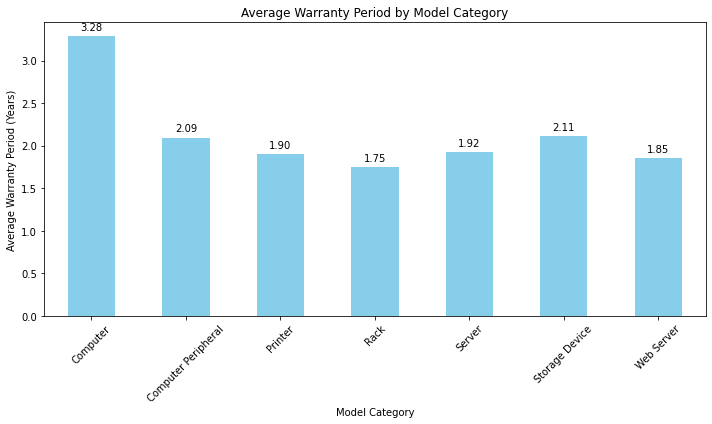

In [3]:
import matplotlib.pyplot as plt

flag_data["warranty_expiration"] = pd.to_datetime(flag_data["warranty_expiration"])
flag_data["sys_updated_on"] = pd.to_datetime(flag_data["sys_updated_on"])
# Calculate the warranty period in years for each asset
flag_data['warranty_period_years'] = (flag_data['warranty_expiration'] - flag_data['sys_updated_on']).dt.days / 365

# Group by model_category and calculate the average warranty period
avg_warranty_by_category = flag_data.groupby('model_category')['warranty_period_years'].mean()

# Plotting
a_plot = avg_warranty_by_category.plot(kind='bar', color='skyblue', figsize=(10, 6))
for p in a_plot.patches:
    a_plot.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points')
plt.xlabel('Model Category')
plt.ylabel('Average Warranty Period (Years)')
plt.title('Average Warranty Period by Model Category')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

#### Generate JSON Description for the Insight

In [4]:
{
    "data_type": "descriptive",
    "insight": "Computers exhibit significantly longer warranty periods compared to other asset categories, which may reflect their higher cost and complexity.",
    "insight_value": {
        "description": "The average warranty period for Computers is markedly higher than for other asset categories, suggesting a strategic emphasis on longer warranties for more expensive and complex equipment."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Warranty Period by Asset Model Category",
        "x_axis": {
            "name": "Model Category",
            "value": ["Computer", "Computer Peripheral", "Printer", "Rack", "Server", "Storage Device", "Web Server"],
            "description": "This axis categorizes different types of assets based on their model category."
        },
        "y_axis": {
            "name": "Average Warranty Period (years)",
            "value": {
                "Computer": "3.28 years",
                "Computer Peripheral": "2.09 years",
                "Printer": "1.90 years",
                "Rack": "1.75 years",
                "Server": "1.92 years",
                "Storage Device": "2.11 years",
                "Web Server": "1.85 years"
            },
            "description": "This axis displays the average warranty period for each model category, clearly showing the variation in warranty terms across different asset types."
        },
        "description": "The bar chart visually represents the average warranty periods across various asset model categories. It highlights that Computers have a significantly longer average warranty of 3.31 years, emphasizing their importance and value within the organization compared to other categories with shorter warranty periods."
    },
    "question": "What is the distribution of Average Warranty Period across Model Categories?",
    "actionable_insight": "The longer warranty period for Computers underlines the need for detailed scrutiny of procurement contracts for these assets. Organizations should consider leveraging this data to negotiate extended warranty periods for other high-value asset categories to ensure better return on investment and reduced maintenance costs."
}


{'data_type': 'descriptive',
 'insight': 'Computers exhibit significantly longer warranty periods compared to other asset categories, which may reflect their higher cost and complexity.',
 'insight_value': {'description': 'The average warranty period for Computers is markedly higher than for other asset categories, suggesting a strategic emphasis on longer warranties for more expensive and complex equipment.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Warranty Period by Asset Model Category',
  'x_axis': {'name': 'Model Category',
   'value': ['Computer',
    'Computer Peripheral',
    'Printer',
    'Rack',
    'Server',
    'Storage Device',
    'Web Server'],
   'description': 'This axis categorizes different types of assets based on their model category.'},
  'y_axis': {'name': 'Average Warranty Period (years)',
   'value': {'Computer': '3.28 years',
    'Computer Peripheral': '2.09 years',
    'Printer': '1.90 years',
    'Rack': '1.75 years',
    'Server': '1.92 years',


### **Question 2: What is the distribution Average asset cost across  Model Categories?**


#### Plot average cost by model category
This cell presents a bar plot that illustrates the average cost of assets within each model category. By analyzing the cost distribution, this visualization helps identify financial implications of asset types managed by the department, offering insights into budget allocations etc.

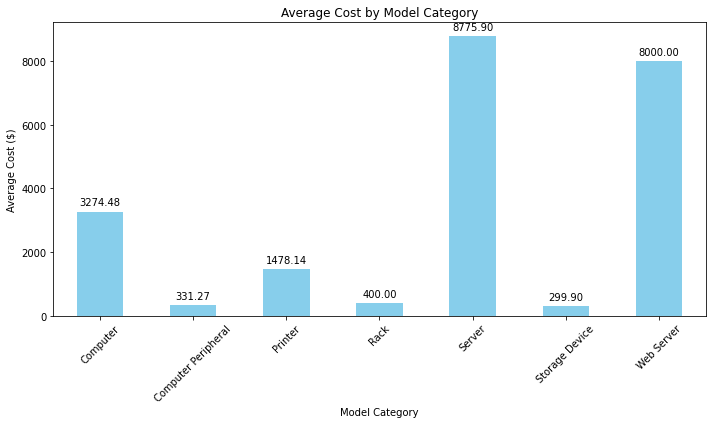

In [5]:
import matplotlib.pyplot as plt

flag_data["warranty_expiration"] = pd.to_datetime(flag_data["warranty_expiration"])
flag_data["sys_updated_on"] = pd.to_datetime(flag_data["sys_updated_on"])
# Calculate the warranty period in years for each asset
flag_data['warranty_period_years'] = (flag_data['warranty_expiration'] - flag_data['sys_updated_on']).dt.days / 365

# Group by model_category and calculate the average warranty period
avg_warranty_by_category = flag_data.groupby('model_category')['cost'].mean()

# Plotting
a_plot = avg_warranty_by_category.plot(kind='bar', color='skyblue', figsize=(10, 6))
for p in a_plot.patches:
    a_plot.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points')
plt.xlabel('Model Category')
plt.ylabel('Average Cost ($)')
plt.title('Average Cost by Model Category')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

# Show the plot
plt.show()

#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "descriptive",
    "insight": "Servers and Web Servers are the most expensive asset categories on average, followed by computers.",
    "insight_value": {
        "description": "Average costs vary significantly across model categories, with Servers and Web Servers leading in terms of investment required."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Asset Cost by Model Category",
        "x_axis": {
            "name": "Model Category",
            "value": ["Server", "Web Server", "Computer", "Printer", "Rack", "Computer Peripheral", "Storage Device"],
            "description": "This axis categorizes different types of assets based on their model category."
        },
        "y_axis": {
            "name": "Average Cost (USD)",
            "value": {
                "Server": "8775.90$",
                "Web Server": "8000$",
                "Computer": "3274.48$",
                "Printer": "1478.14$",
                "Rack": "400.0$",
                "Computer Peripheral": "331.27$",
                "Storage Device": "299.9$"
            },
            "description": "This axis displays the average cost for each asset model category, highlighting the substantial cost disparities among different asset types."
        },
        "description": "The bar chart clearly illustrates the average costs associated with different asset model categories within the organization. It underscores that Servers and Web Servers are notably more expensive on average than other categories such as Computers, Printers, and more peripheral equipment."
    },
    "question": "What is the distribution of Average asset cost across Model Categories?",
    "actionable_insight": "Given the higher average costs associated with Servers and Web Servers, it's essential for the organization to carefully consider the lifecycle costs and benefits of these investments. Prioritizing maintenance and potentially exploring bulk purchasing agreements or extended warranties for these high-cost items could yield significant cost savings over time."
}


{'data_type': 'descriptive',
 'insight': 'Servers and Web Servers are the most expensive asset categories on average, followed by computers.',
 'insight_value': {'description': 'Average costs vary significantly across model categories, with Servers and Web Servers leading in terms of investment required.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Asset Cost by Model Category',
  'x_axis': {'name': 'Model Category',
   'value': ['Server',
    'Web Server',
    'Computer',
    'Printer',
    'Rack',
    'Computer Peripheral',
    'Storage Device'],
   'description': 'This axis categorizes different types of assets based on their model category.'},
  'y_axis': {'name': 'Average Cost (USD)',
   'value': {'Server': '8775.90$',
    'Web Server': '8000$',
    'Computer': '3274.48$',
    'Printer': '1478.14$',
    'Rack': '400.0$',
    'Computer Peripheral': '331.27$',
    'Storage Device': '299.9$'},
   'description': 'This axis displays the average cost for each asset model categor

### **Question 3: What is the correlation between the cost of computer assets and their warranty periods?**


#### Plot correlation between cost and warranty period of computers
This cell creates a scatter plot to visualize the relationship between the cost of computer assets and their warranty periods within 'Computer' model category. By plotting cost against warranty duration, this plot aims to explore whether more expensive computer assets come with longer warranties perhaps indicating higher quality or confidence from manufacturers.

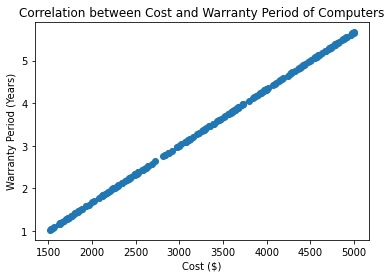

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

flag_data["warranty_expiration"] = pd.to_datetime(flag_data["warranty_expiration"])
flag_data["purchased_on"] = pd.to_datetime(flag_data["purchased_on"])

computer_data = flag_data[flag_data['model_category'] == 'Computer']
plt.scatter(computer_data['cost'], (computer_data['warranty_expiration'] - computer_data['purchased_on']).dt.days / 365)
plt.xlabel('Cost ($)')
plt.ylabel('Warranty Period (Years)')
plt.title('Correlation between Cost and Warranty Period of Computers')
plt.show()

#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "correlative",
    "insight": "Strong positive correlation between the cost of computer assets and their warranty periods.",
    "insight_value": {
        "description": "More expensive computer assets tend to have longer warranty periods, suggesting that higher costs are associated with extended warranty provisions."
    },
    "plot": {
        "plot_type": "scatter",
        "title": "Correlation Between Cost of Computers and Their Warranty Periods",
        "x_axis": {
            "name": "Cost of Computer Assets (USD)",
            "value": "Continuously variable cost amounts",
            "description": "This axis represents the cost of computer assets, highlighting a range from lower to higher priced models."
        },
        "y_axis": {
            "name": "Warranty Period (years)",
            "value": "Continuously variable warranty durations",
            "description": "This axis displays the warranty periods associated with each cost level, illustrating how warranty durations increase with asset cost."
        },
        "description": "The scatter plot demonstrates a clear linear correlation between the cost of computer assets and their warranty periods. This trend confirms that more expensive computers not only cost more but also come with longer warranties, possibly reflecting a manufacturer's confidence in their high-value products."
    },
    "question": "What is the correlation between the cost of computer assets and their warranty periods?",
    "actionable_insight": "This observed correlation suggests that investing in more expensive computer assets could be beneficial for the organization in terms of receiving longer warranty periods, which might translate to lower long-term maintenance costs and greater asset reliability. It is advisable for procurement teams to factor in warranty durations when assessing the total cost of ownership for high-end computer assets."
}


{'data_type': 'correlative',
 'insight': 'Strong positive correlation between the cost of computer assets and their warranty periods.',
 'insight_value': {'description': 'More expensive computer assets tend to have longer warranty periods, suggesting that higher costs are associated with extended warranty provisions.'},
 'plot': {'plot_type': 'scatter',
  'title': 'Correlation Between Cost of Computers and Their Warranty Periods',
  'x_axis': {'name': 'Cost of Computer Assets (USD)',
   'value': 'Continuously variable cost amounts',
   'description': 'This axis represents the cost of computer assets, highlighting a range from lower to higher priced models.'},
  'y_axis': {'name': 'Warranty Period (years)',
   'value': 'Continuously variable warranty durations',
   'description': 'This axis displays the warranty periods associated with each cost level, illustrating how warranty durations increase with asset cost.'},
  'description': "The scatter plot demonstrates a clear linear correlat

**Question 4: What implications does the correlation between cost and warranty period have for asset lifecycle management?


Given the established correlation between the cost of computer assets and their warranty periods, the implications for asset lifecycle management cpould be significant:
1. **Strategic Procurement**: Organizations can strategize their procurement practices by opting for higher-cost assets that come with longer warranties. This approach could reduce long-term maintenance costs. 
2. **Budget Planning**: Understanding the correlation helps in forecasting budget allocations more accurately. Longer warranty periods on more expensive assets might initially raise procurement costs but can decrease the total cost of ownership by lowering post-warranty repair and replacement expenses.
3. **Risk Management**: By choosing assets with longer warranties, organizations can mitigate the risk associated with equipment failures.
In essence, the correlation between asset cost and warranty duration informs a more thoughtful, cost-effective approach to managing the lifecycle of technology assets, aligning procurement strategies with long-term operational and financial planning.

### Summary of Findings (Flag 16):

1. **Data Insights**: The dataset comprises entries from the ServiceNow alm_hardware table, detailing attributes like asset tags, costs, and warranty expiration dates. 

2. **Trend Observation**: The dataset captures a trend where the warranty period of computer assets increases as their cost increases. This suggests that more expensive assets may come with longer warranties, potentially reflecting higher confidence from manufacturers in their more advanced or higher-quality products.

3. **Strategic Implications**: Understanding these trends is crucial for strategic asset management, offering insights that can inform procurement decisions and asset lifecycle planning.